Masking 후에 은하 중심이 이미지 중심과 일치하는지 확인

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 

import atm

ddir = "../../tonemap/bf_data/Nair_and_Abraham_2010/"

fn = ddir + "all_gals.pickle"
all_gals = pickle.load(open(fn, "rb"))

all_gals = all_gals[1:] # Why the first galaxy image is NaN?

good_gids = np.array([gal['img_name'] for gal in all_gals])

from astrobf.utils.misc import load_Nair
cat_data = load_Nair(ddir + "catalog/table2.dat")
# pd dataframe

cat = cat_data[cat_data['ID'].isin(good_gids)]

tmo_params = {'b': 6.0,  'c': 3.96, 'dl': 9.22, 'dh': 2.45}


In [16]:
def to_8bit(image):
    """
    Normalize per image (or use global min max??)
    """

    image = (image - image.min())/image.ptp()
    image *= 255
    return image.astype('uint8')        

all_gals는 더 큰 이미지에서 잘라낸 것임. slice object는 원래 이미지에 대한 index를 저장했음.

그렇다면, 지금 있는 이미지에서 center를 다시 정해야 함. 
Asymmetric center를 계산해야할 듯. 이미 계산된게 있는가? 

custom_moprh.MorphImage.measure_all -> _calculate_asym()이걸 한번 쭉 돌리기. 


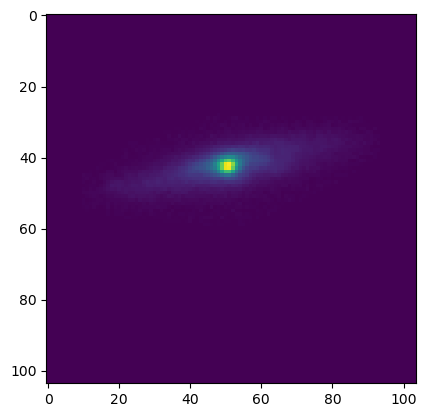

In [45]:
image, _segmap, weight = all_gals[1]['data']
image[~_segmap.astype(bool)] = 0#np.nan # Is it OK to have nan?
image[image < 0] = 0
plt.imshow(image)
plt.show()

In [19]:
from PIL import Image

image[~_segmap.astype(bool)] = 0#np.nan # Is it OK to have nan?
image[image < 0] = 0

image = to_8bit(image)
image = Image.fromarray(image)

In [32]:
image.shape

(118, 118)

In [30]:
image[all_gals[0]['slices']]

array([], shape=(0, 0), dtype=float32)

In [25]:
all_gals[0]['slices']

(slice(179, 297, None), slice(179, 297, None))

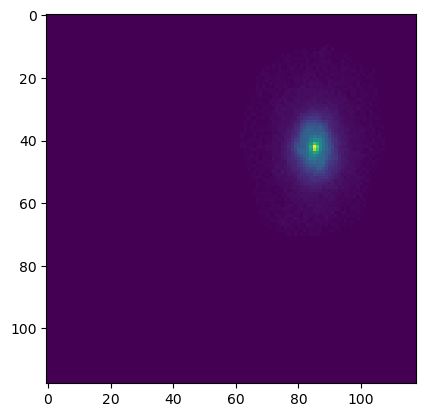

In [23]:
plt.imshow(image)
plt.show()